In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score

In [39]:
df=pd.read_csv('traffic accident india -2016-18.csv',index_col='City')
df.head(10)

Total Registered Motor Vehicles (as of 2016)  Year Accident type  \
City                                                                          
Ahmedabad                                       3656000  2016      Injuries   
Ahmedabad                                       3656000  2016    Fatalities   
Ahmedabad                                       3656000  2017      Injuries   
Ahmedabad                                       3656000  2017    Fatalities   
Ahmedabad                                       3656000  2018      Injuries   
Ahmedabad                                       3656000  2018    Fatalities   
Bangalore                                       6113000  2016      Injuries   
Bangalore                                       6113000  2016    Fatalities   
Bangalore                                       6113000  2017      Injuries   
Bangalore                                       6113000  2017    Fatalities   

           Pedestrian  Bicycles  Two-wheelers  \
City                                            
Ahmedabad       606.0      76.0         787.0   
Ahmedabad       125.0      11.0          96.0   
Ahmedabad       484.0      48.0         544.0   
Ahmedabad       126.0      15.0          71.0   
Ahmedabad       558.0      58.0         653.0   
Ahmedabad       132.0      14.0         110.0   
Bangalore       571.0      34.0        1848.0   
Bangalore       215.0       7.0         374.0   
Bangalore      1346.0      31.0        1499.0   
Bangalore       284.0       8.0          98.0   

           Other modes of road transport (auto, bus, lorry)  Total  
City                                                                
Ahmedabad                                             231.0    315  
Ahmedabad                                              83.0    315  
Ahmedabad                                             214.0   1290  
Ahmedabad                                              82.0    294  
Ahmedabad                                             256.0   1525  
Ahmedabad                                              64.0    320  
Bangalore                                            1811.0   4264  
Bangalore                                             239.0    835  
Bangalore                                            1380.0   4256  
Bangalore                                             252.0    642

In [40]:
df.columns=['Total_Registered_Vehicles', 'Year',
       'Accident_type', 'Pedestrian', 'Bicycles', 'Two_wheelers',
       'Other_modes_of_transport', 'Total']

In [41]:
df.columns

Index(['Total_Registered_Vehicles', 'Year', 'Accident_type', 'Pedestrian',
       'Bicycles', 'Two_wheelers', 'Other_modes_of_transport', 'Total'],
      dtype='object')

In [42]:
df=df.drop('Pedestrian',axis=1)

In [43]:
unique_counts = df.nunique()
print(unique_counts)

Total_Registered_Vehicles     8
Year                          3
Accident_type                 2
Bicycles                     30
Two_wheelers                 46
Other_modes_of_transport     44
Total                        43
dtype: int64


In [44]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':\n{unique_values}\n")

Unique values in 'Total_Registered_Vehicles':
[3656000 6113000  837000 4938000 1811000 1818000 1475000  783000]

Unique values in 'Year':
[2016 2017 2018]

Unique values in 'Accident_type':
['Injuries' 'Fatalities']

Unique values in 'Bicycles':
[7.600e+01 1.100e+01 4.800e+01 1.500e+01 5.800e+01 1.400e+01 3.400e+01
 7.000e+00 3.100e+01 8.000e+00 4.300e+01 9.000e+00 2.700e+01 2.800e+01
 1.300e+01       nan 6.300e+01 6.800e+01 6.000e+00 4.700e+01 1.000e+00
 6.700e+02 3.920e+02 1.498e+03 9.940e+02 3.100e+02 2.100e+01 8.000e+01
 2.400e+01 1.200e+01 1.900e+01]

Unique values in 'Two_wheelers':
[ 787.   96.  544.   71.  653.  110. 1848.  374. 1499.   98. 2266.  311.
  150.   57.  159.   46.  148.   40. 3774.  454. 2334.  452. 2553.  503.
 1308.  137. 1310.  161.  878.   90. 7754. 5502. 7662. 5805.   nan  390.
  141.  384.   87.  312.  111.  594.  132.  626.  146.  744.  136.]

Unique values in 'Other_modes_of_transport':
[ 231.   83.  214.   82.  256.   64. 1811.  239. 1380.  252.  601.   90

In [45]:
df.isna().sum()

Total_Registered_Vehicles    0
Year                         0
Accident_type                0
Bicycles                     8
Two_wheelers                 2
Other_modes_of_transport     2
Total                        0
dtype: int64

In [46]:
df.head()

Total_Registered_Vehicles  Year Accident_type  Bicycles  \
City                                                                 
Ahmedabad                    3656000  2016      Injuries      76.0   
Ahmedabad                    3656000  2016    Fatalities      11.0   
Ahmedabad                    3656000  2017      Injuries      48.0   
Ahmedabad                    3656000  2017    Fatalities      15.0   
Ahmedabad                    3656000  2018      Injuries      58.0   

           Two_wheelers  Other_modes_of_transport  Total  
City                                                      
Ahmedabad         787.0                     231.0    315  
Ahmedabad          96.0                      83.0    315  
Ahmedabad         544.0                     214.0   1290  
Ahmedabad          71.0                      82.0    294  
Ahmedabad         653.0                     256.0   1525

In [47]:
median=df.Bicycles.median()
median

25.5

In [48]:
def impute_nan(df,variable,median):
    df[variable+"_noNull"]=df[variable].fillna(median)
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [49]:
impute_nan(df,"Bicycles",median)

In [50]:
impute_nan(df,"Two_wheelers",median)

In [51]:
impute_nan(df,"Other_modes_of_transport",median)

In [52]:
df=df.drop(['Bicycles_random','Two_wheelers_random','Other_modes_of_transport_random'],axis=1)
#df=df.drop(['Bicycles','Two_wheelers','Other_modes_of_transport'],axis=1)

In [53]:
df.head()

Total_Registered_Vehicles  Year Accident_type  Bicycles  \
City                                                                 
Ahmedabad                    3656000  2016      Injuries      76.0   
Ahmedabad                    3656000  2016    Fatalities      11.0   
Ahmedabad                    3656000  2017      Injuries      48.0   
Ahmedabad                    3656000  2017    Fatalities      15.0   
Ahmedabad                    3656000  2018      Injuries      58.0   

           Two_wheelers  Other_modes_of_transport  Total  Bicycles_noNull  \
City                                                                        
Ahmedabad         787.0                     231.0    315             76.0   
Ahmedabad          96.0                      83.0    315             11.0   
Ahmedabad         544.0                     214.0   1290             48.0   
Ahmedabad          71.0                      82.0    294             15.0   
Ahmedabad         653.0                     256.0   1525             58.0   

           Two_wheelers_noNull  Other_modes_of_transport_noNull  
City                                                             
Ahmedabad                787.0                            231.0  
Ahmedabad                 96.0                             83.0  
Ahmedabad                544.0                            214.0  
Ahmedabad                 71.0                             82.0  
Ahmedabad                653.0                            256.0

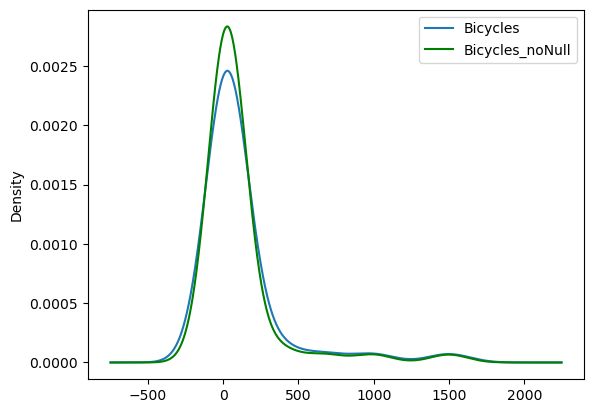

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Bicycles'].plot(kind='kde', ax=ax)
df.Bicycles_noNull.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [55]:
df=df.drop(['Bicycles','Two_wheelers','Other_modes_of_transport'],axis=1)

<Axes: >

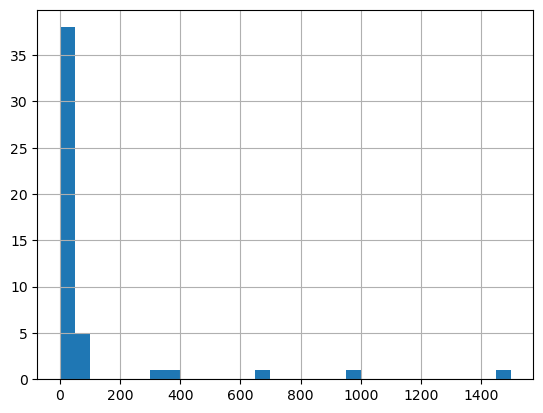

In [56]:
df.Bicycles_noNull.hist(bins=30)

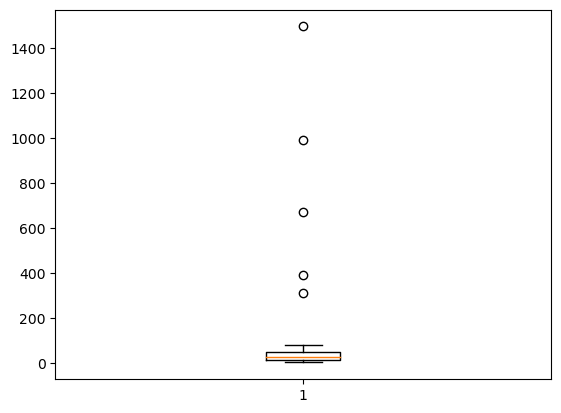

In [57]:
plt.boxplot(df.Bicycles_noNull)
plt.show()

In [58]:
def cap_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bridge = Q1 - (IQR * 1.5)
        upper_bridge = Q3 + (IQR * 1.5)
        df.loc[df[column] < lower_bridge, column] = lower_bridge
        df.loc[df[column] > upper_bridge, column] = upper_bridge
    return df

In [59]:
columns_to_cap = ['Total_Registered_Vehicles', 'Total', 'Bicycles_noNull', 'Two_wheelers_noNull', 'Other_modes_of_transport_noNull']
df = cap_outliers(df, columns_to_cap)

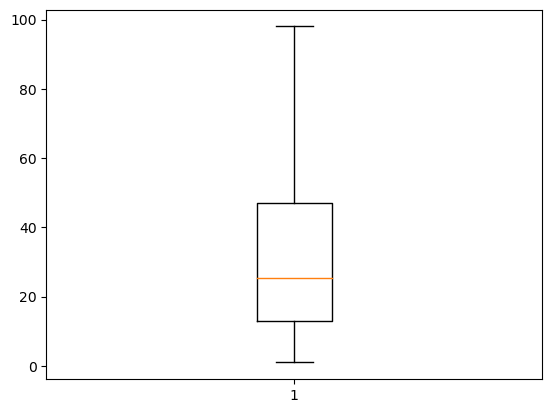

In [60]:
plt.boxplot(df.Bicycles_noNull)
plt.show()

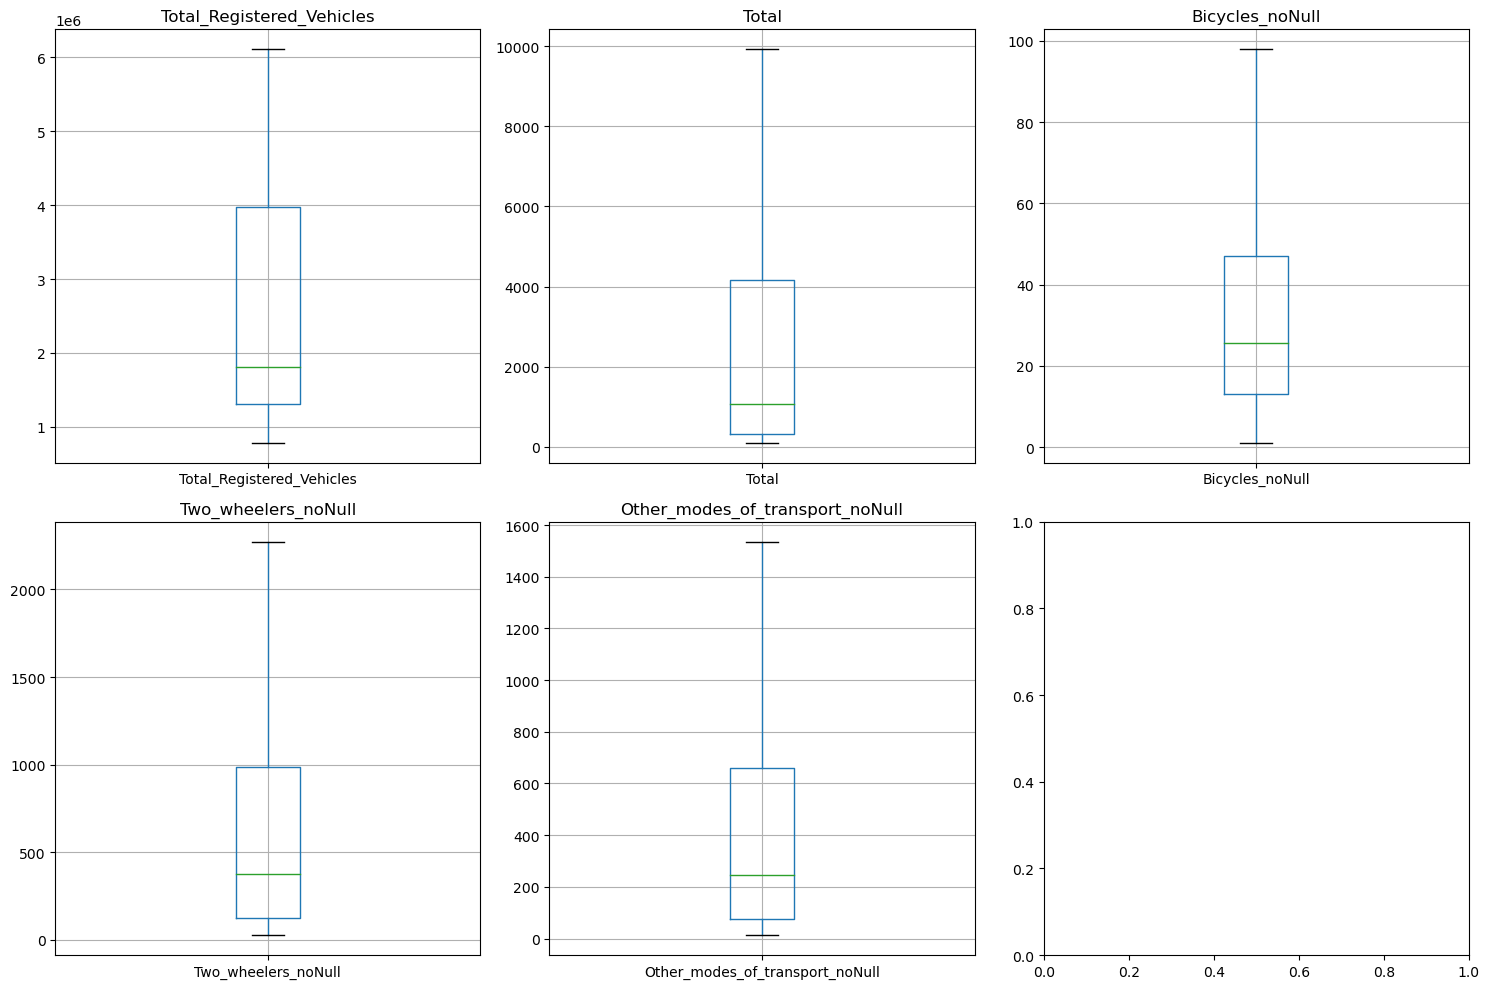

In [61]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for ax, column in zip(axes, columns_to_cap):
    df.boxplot(column=column, ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()

In [62]:
df['Accident_type'].isna().sum()

0

In [63]:
df = pd.get_dummies(df, columns=['Accident_type'], drop_first=True)
categories = ['True', 'False']
df['Accident_type_Injuries'] = np.where(df['Accident_type_Injuries'].isin(categories), 1, 0)

In [64]:
df.head()

Total_Registered_Vehicles  Year   Total  Bicycles_noNull  \
City                                                                  
Ahmedabad                    3656000  2016   315.0             76.0   
Ahmedabad                    3656000  2016   315.0             11.0   
Ahmedabad                    3656000  2017  1290.0             48.0   
Ahmedabad                    3656000  2017   294.0             15.0   
Ahmedabad                    3656000  2018  1525.0             58.0   

           Two_wheelers_noNull  Other_modes_of_transport_noNull  \
City                                                              
Ahmedabad                787.0                            231.0   
Ahmedabad                 96.0                             83.0   
Ahmedabad                544.0                            214.0   
Ahmedabad                 71.0                             82.0   
Ahmedabad                653.0                            256.0   

           Accident_type_Injuries  
City                               
Ahmedabad                       0  
Ahmedabad                       0  
Ahmedabad                       0  
Ahmedabad                       0  
Ahmedabad                       0

In [65]:
X = df.drop('Total', axis=1)  
y = df['Total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [66]:
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse/1000)


Mean Squared Error: 30.62917010921875


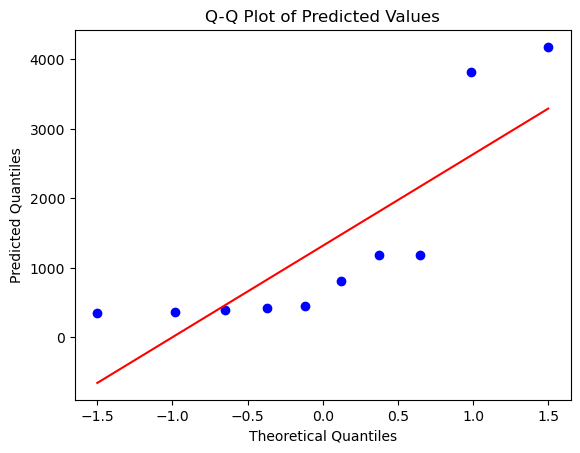

In [67]:
# Predict the values
y_pred = regressor.predict(X_test)

# Create the Q-Q plot
res = stats.probplot(y_pred, plot=plt)
plt.title('Q-Q Plot of Predicted Values')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Predicted Quantiles')
plt.show()


In [68]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize GradientBoostingRegressor
regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 173093.75564237242


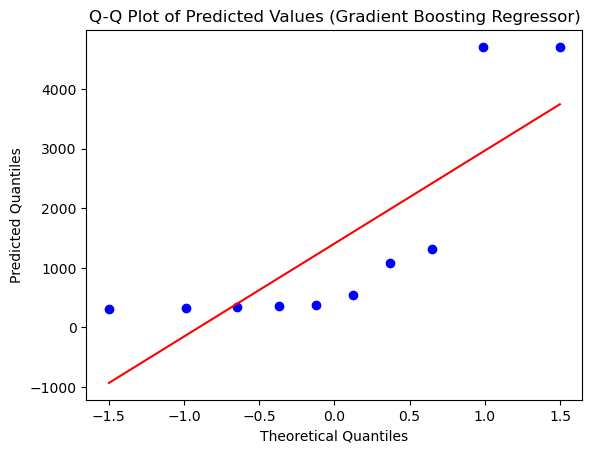

In [69]:
# Create the Q-Q plot for Gradient Boosting Regressor
res = stats.probplot(y_pred, plot=plt)
plt.title('Q-Q Plot of Predicted Values (Gradient Boosting Regressor)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Predicted Quantiles')
plt.show()


In [70]:
X = df.drop('Total', axis=1)  # Features
y = df['Total']  # Target variable

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert the target variable to numerical values
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize ExtraTreesRegressor
regressor = ExtraTreesRegressor(n_estimators=100, random_state=42)

# Train the model
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 18.834480000000003


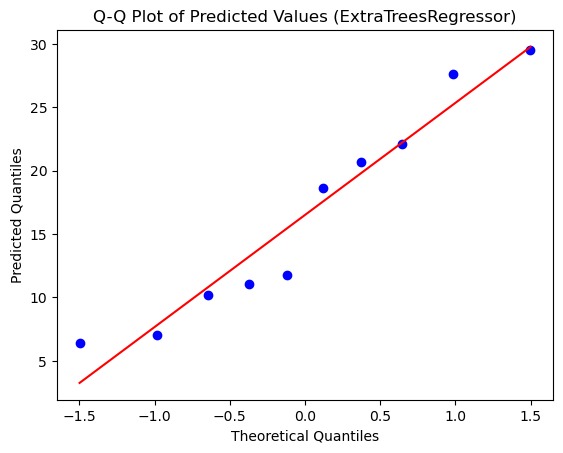

In [71]:
# Create the Q-Q plot for ExtraTreesRegressor
res = stats.probplot(y_pred, plot=plt)
plt.title('Q-Q Plot of Predicted Values (ExtraTreesRegressor)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Predicted Quantiles')
plt.show()


In [72]:
# Split data
X = df.drop('Total', axis=1)  # Features
y = df['Total']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create model
model = LinearRegression()

# Train model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)

print(f"MSE: {mse}")


MSE: 2050468.6151080143


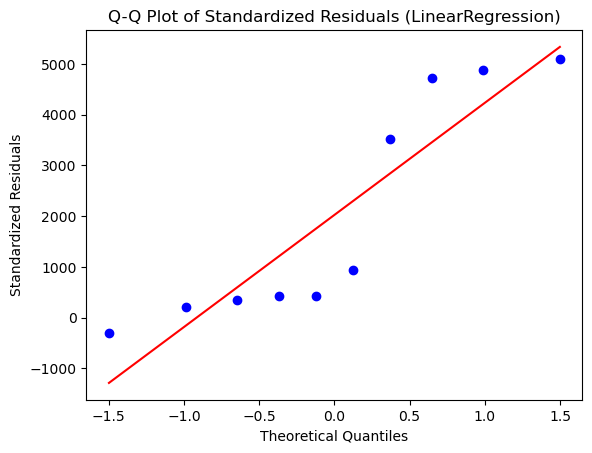

In [73]:
# Create the Q-Q plot for LinearRegression
from scipy import stats

res = stats.probplot(y_pred, plot=plt)
plt.title('Q-Q Plot of Standardized Residuals (LinearRegression)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show()

In [74]:
df.columns

Index(['Total_Registered_Vehicles', 'Year', 'Total', 'Bicycles_noNull',
       'Two_wheelers_noNull', 'Other_modes_of_transport_noNull',
       'Accident_type_Injuries'],
      dtype='object')

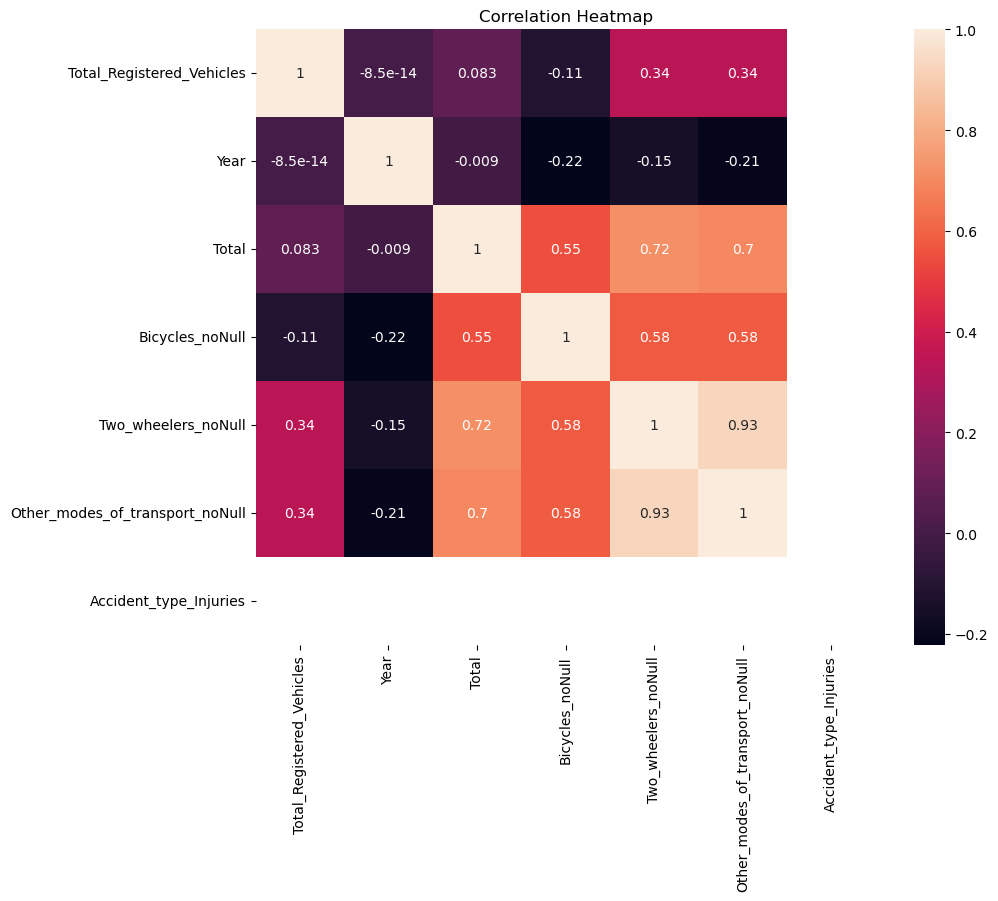

In [75]:
Visual_data = df[['Total_Registered_Vehicles', 'Year', 'Total', 'Bicycles_noNull',
       'Two_wheelers_noNull', 'Other_modes_of_transport_noNull',
       'Accident_type_Injuries']]
plt.figure(figsize=(10, 8))
sns.heatmap(Visual_data.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


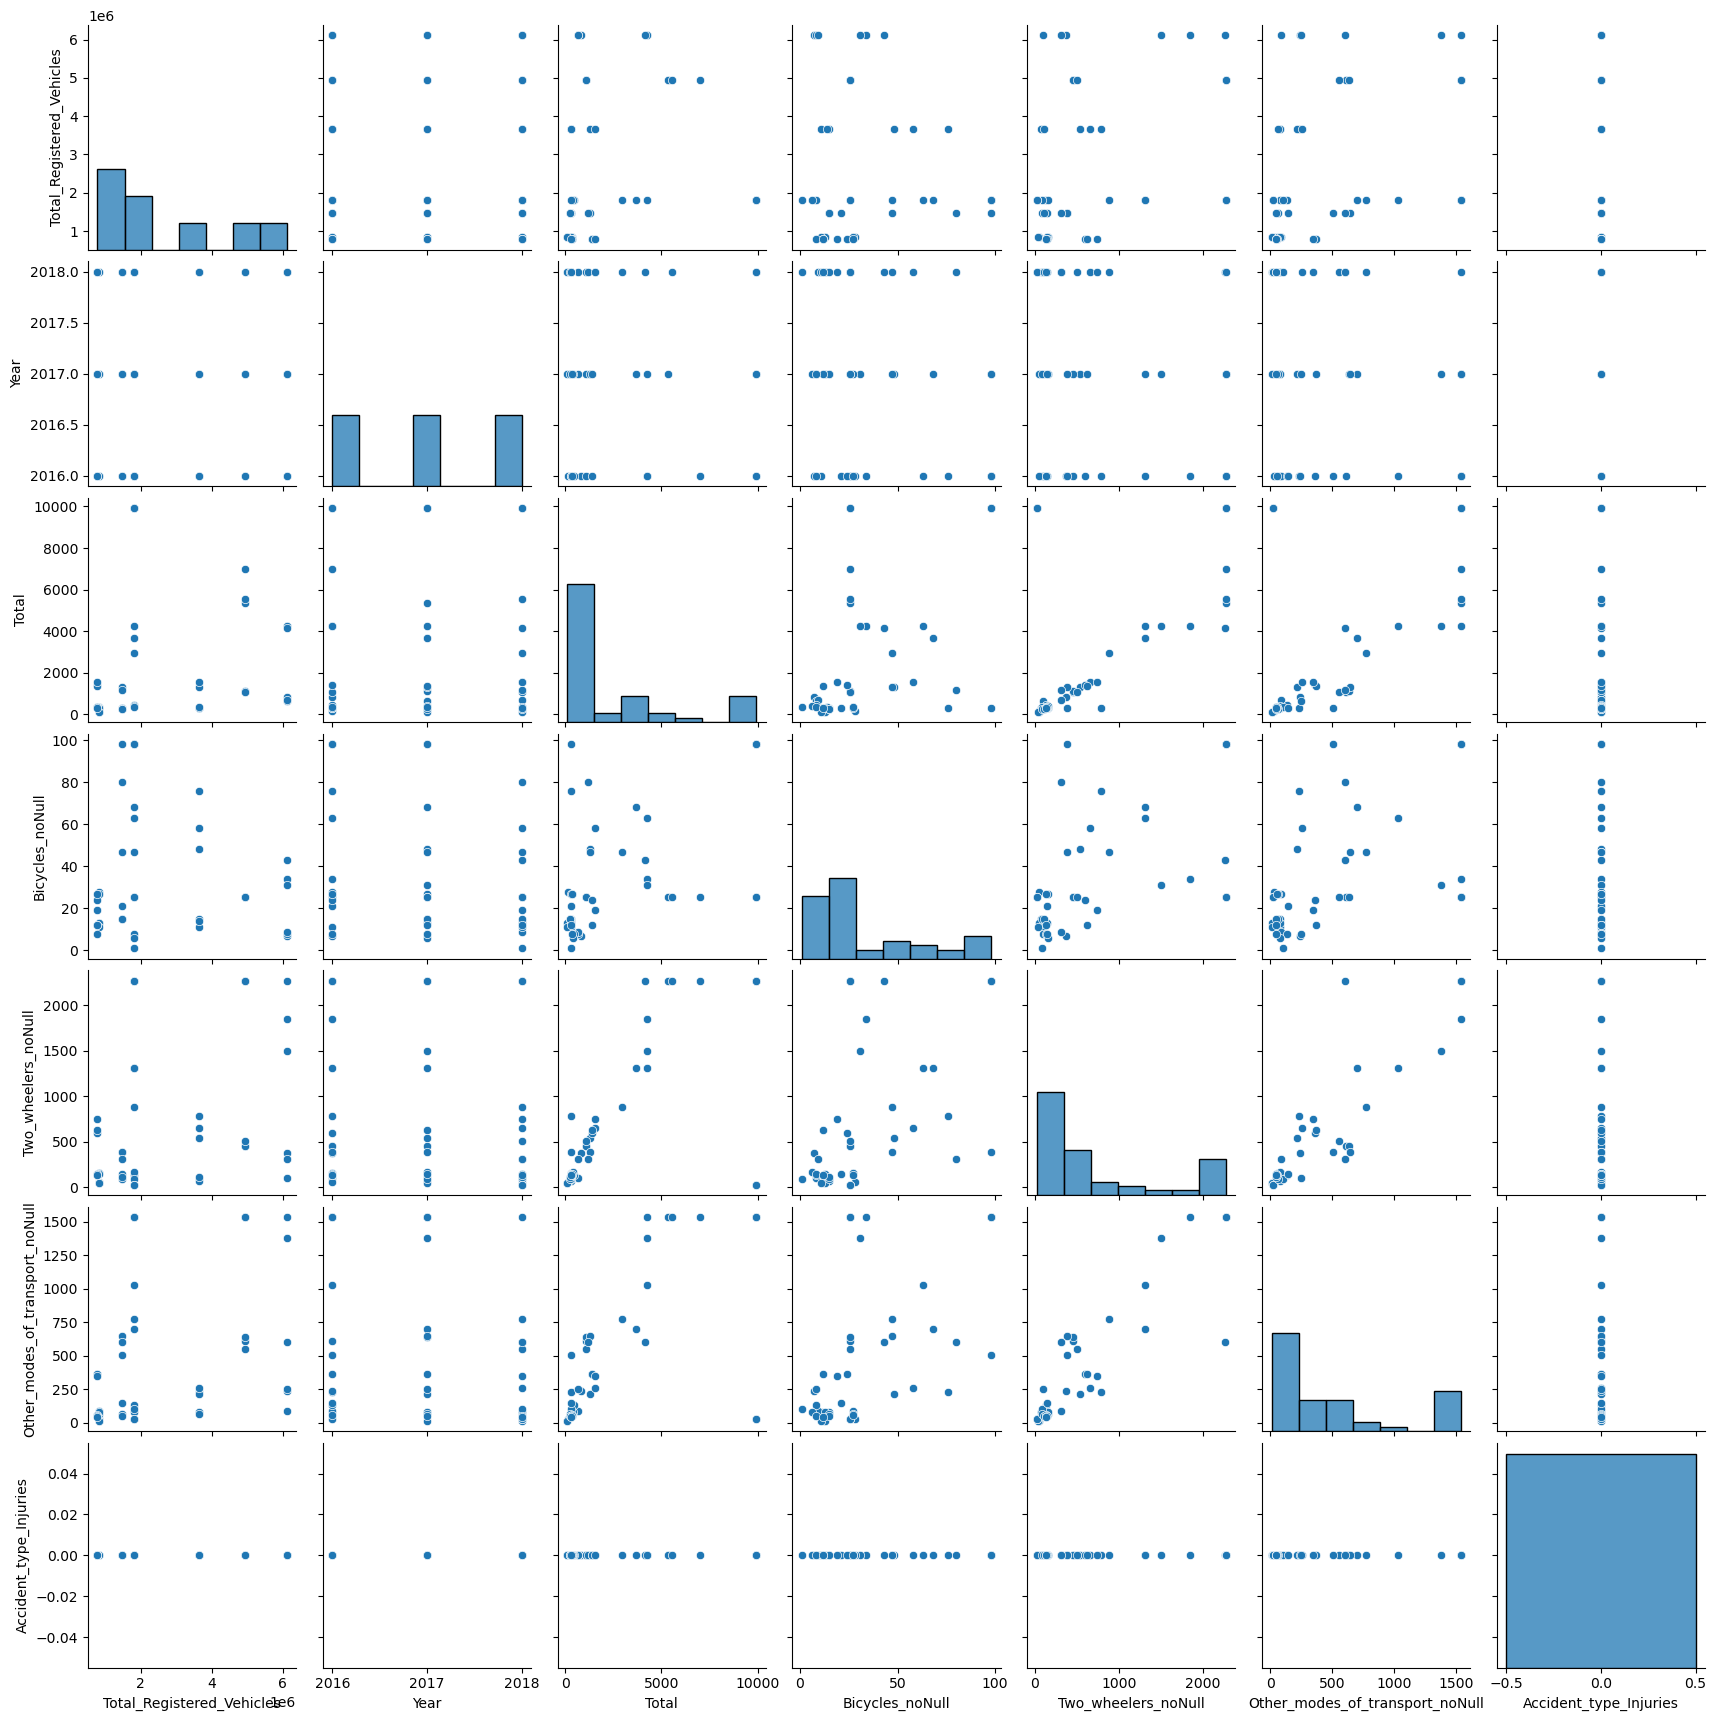

In [76]:
sns.pairplot(Visual_data, diag_kind="hist")


In [77]:
df.head()

Total_Registered_Vehicles  Year   Total  Bicycles_noNull  \
City                                                                  
Ahmedabad                    3656000  2016   315.0             76.0   
Ahmedabad                    3656000  2016   315.0             11.0   
Ahmedabad                    3656000  2017  1290.0             48.0   
Ahmedabad                    3656000  2017   294.0             15.0   
Ahmedabad                    3656000  2018  1525.0             58.0   

           Two_wheelers_noNull  Other_modes_of_transport_noNull  \
City                                                              
Ahmedabad                787.0                            231.0   
Ahmedabad                 96.0                             83.0   
Ahmedabad                544.0                            214.0   
Ahmedabad                 71.0                             82.0   
Ahmedabad                653.0                            256.0   

           Accident_type_Injuries  
City                               
Ahmedabad                       0  
Ahmedabad                       0  
Ahmedabad                       0  
Ahmedabad                       0  
Ahmedabad                       0

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


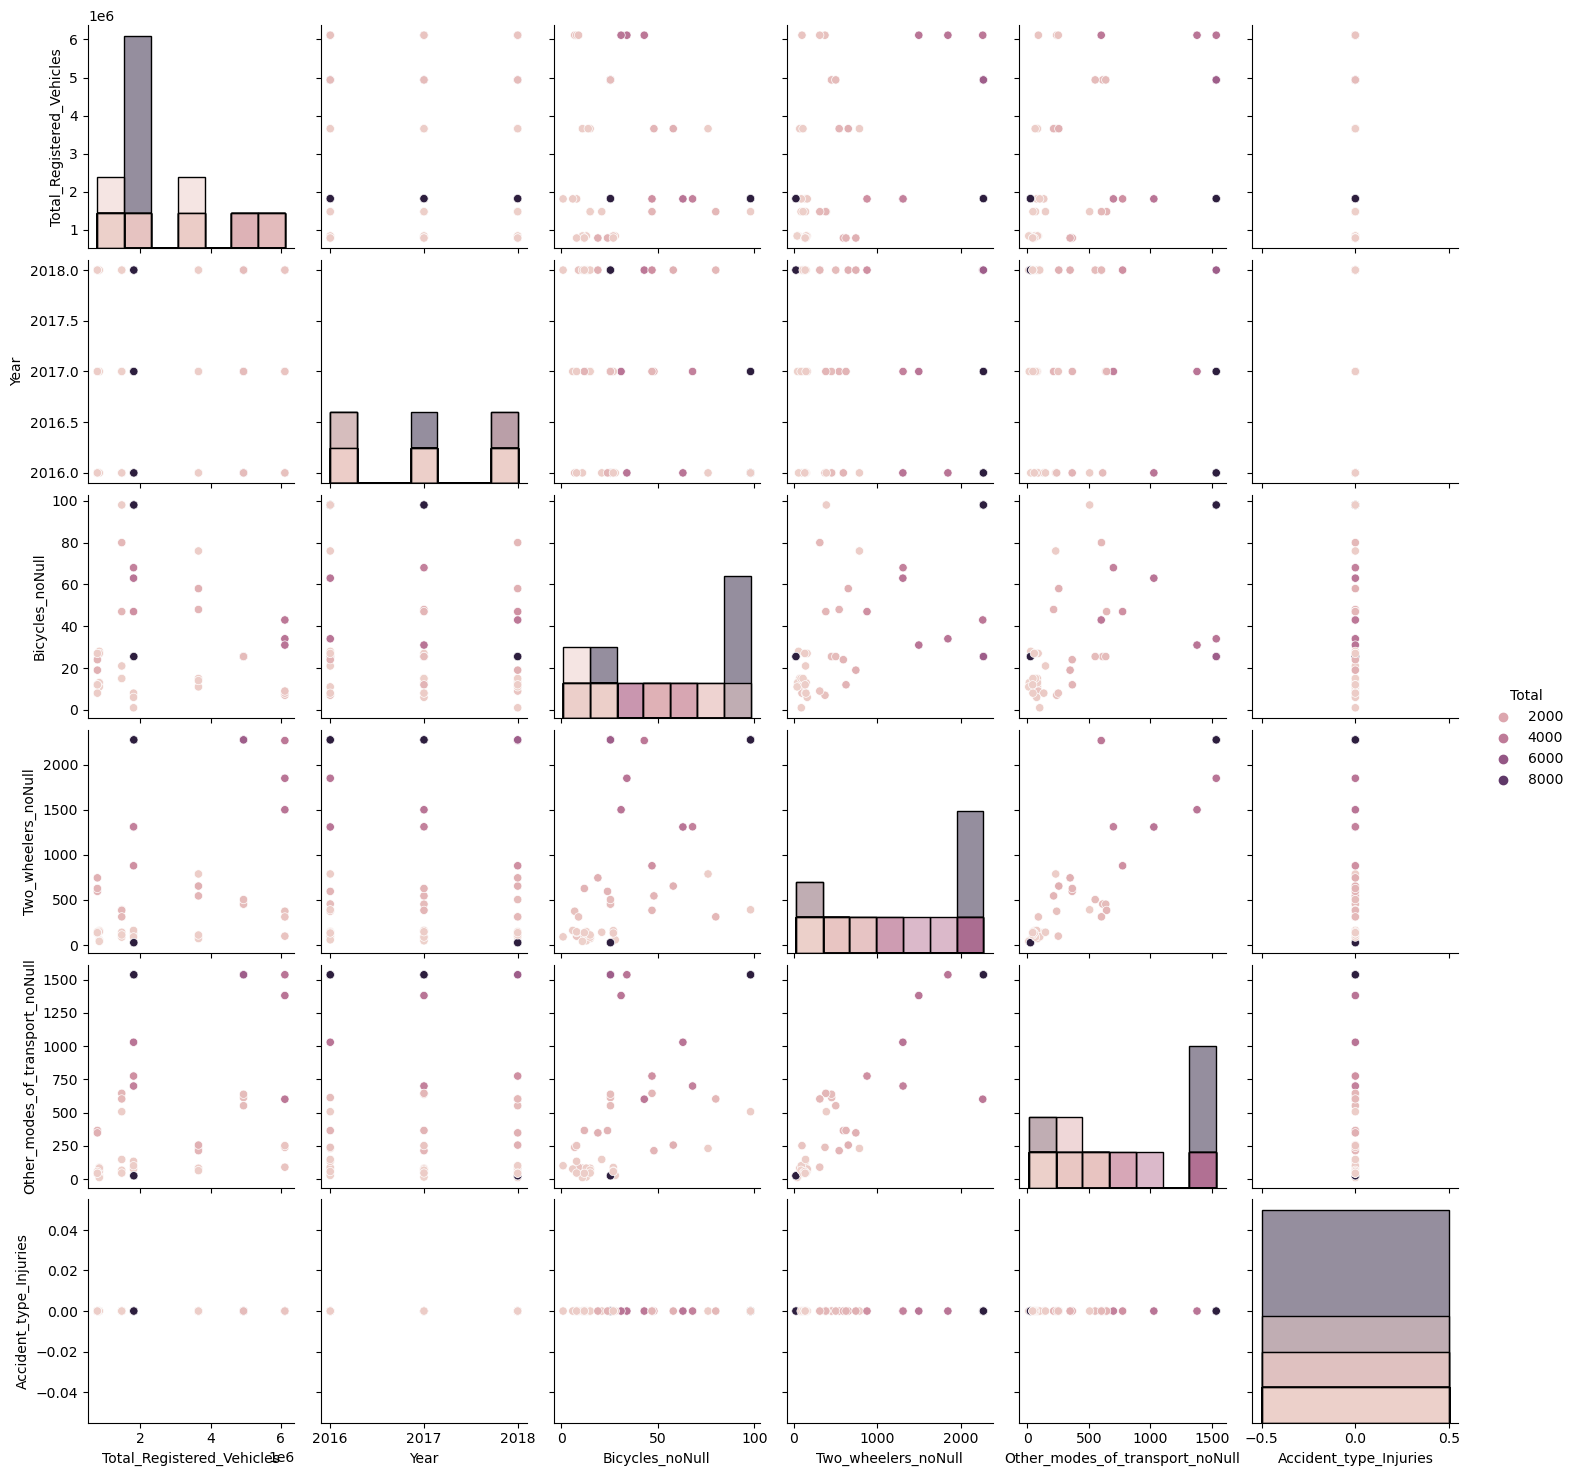

In [78]:
data=pd.DataFrame(df[['Total_Registered_Vehicles', 'Year', 'Total', 'Bicycles_noNull',
       'Two_wheelers_noNull', 'Other_modes_of_transport_noNull',
       'Accident_type_Injuries']])
sns.pairplot(data,hue='Total',diag_kind='hist')
plt.show()

In [82]:
from bokeh.plotting import figure, output_notebook, show

# Call output_notebook to display output in Jupyter Notebook
output_notebook()

# Create a figure with a width and height
p = figure(width=400, height=400)

# Add a circle renderer with a size, color, and alpha
p.circle(data['Total_Registered_Vehicles'], data['Total'], size=20, color="navy", alpha=0.5)

p.xaxis.axis_label = 'Total Registered Vehicles'

# Name the y-axis
p.yaxis.axis_label = 'Total'

# Show the results
show(p)


Loading BokehJS ...

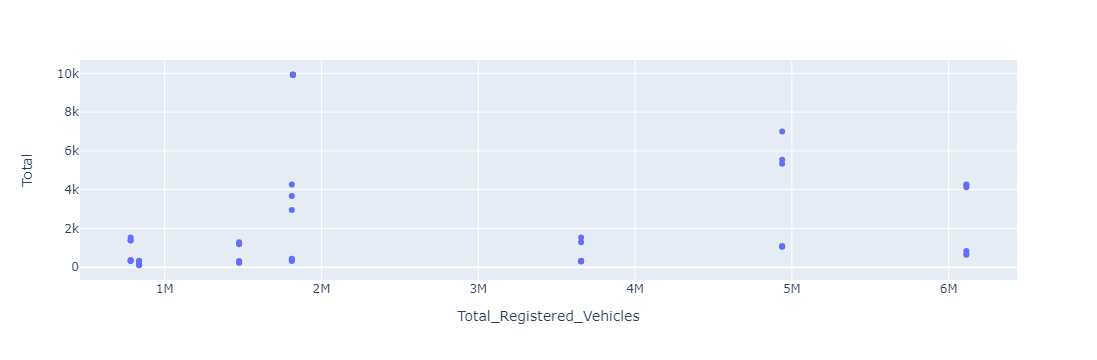

In [80]:
import plotly.express as px
import pandas as pd

# Create a DataFrame
data = pd.DataFrame(df[['Total_Registered_Vehicles', 'Year', 'Total', 'Bicycles_noNull',
                        'Two_wheelers_noNull', 'Other_modes_of_transport_noNull',
                        'Accident_type_Injuries']])

# Create a scatter plot
fig = px.scatter(data, x='Total_Registered_Vehicles', y='Total')

# Show the plot
fig.show()
